<a href="https://colab.research.google.com/github/Artur-DesenvolvimentoWEB/Analise_dados_pandas_DIO/blob/main/Projeto_Pandas_DIO_3_Trabalhando_com_Excel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando pandas

import pandas as pd

In [ ]:
#Leitura dos arquivos
df1 = pd.read_excel("/content/drive/MyDrive/DIO - Python/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/DIO - Python/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/DIO - Python/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/DIO - Python/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/DIO - Python/datasets/Salvador.xlsx")

In [ ]:
df = pd.concat([df1, df2, df3, df4,df5])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
229,Natal,2019-01-02,43.08,1036,2
120,Salvador,2019-03-02,140.17,1036,2
129,Recife,2019-03-02,35.34,982,7
71,Aracaju,2018-01-01,228.27,1523,6
37,Recife,2019-01-01,136.36,980,7


In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
#alterando tipo de uma coluna
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
#somando valores nulos
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#substituindo valores nulos pela media da coluna
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [ ]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Substituindo os valores nulos por 0
df["Vendas"].fillna(0, inplace=True)

In [ ]:
#apagando as linhas com valores nulos
df.dropna(inplace=True)

In [ ]:
#apagando as linhas com valores nulos somente na tabela vendas

df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
#removendo todas as linhas com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

##Criando novas colunas


In [ ]:
#Criando coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [ ]:
df["Receita"].max()

3544.0

In [ ]:
df["Receita"].min()

3.34

In [ ]:
#top 3 maiores receitas
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [ ]:
#top 3 menores receitas
df.nsmallest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [ ]:
#agrupamento de receita por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


#Trabalhando com datas

In [ ]:
df["Data"] = df["Data"].astype("int64")

In [ ]:
#Transformando coluna de int para data
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df.dtypes

Cidade                      object
Data                datetime64[ns]
Vendas                     float64
LojaID                      object
Qtde                         int64
Receita                    float64
Receita/Vendas             float64
Ano_Venda                    int64
Mes_Venda                    int64
Dia_Venda                    int64
diferenca_dias     timedelta64[ns]
trimestre_venda              int64
dtype: object

In [ ]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,diferenca_dias,trimestre_venda
222,Salvador,2019-01-02,43.96,1037,1,43.96,1.0,2019,1,2,366 days,1
26,Aracaju,2018-01-01,6.98,1521,10,69.80,10.0,2018,1,1,0 days,1
161,Natal,2019-01-02,5.80,1036,1,5.80,1.0,2019,1,2,366 days,1
191,Salvador,2019-01-02,173.59,1034,2,347.18,2.0,2019,1,2,366 days,1
135,Natal,2019-01-02,9.95,1037,3,29.85,3.0,2019,1,2,366 days,1


In [ ]:
#Extraindo o mês e o dia
df["Mes_Venda"], df["Dia_Venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,diferenca_dias,trimestre_venda
197,Natal,2019-01-02,10.45,1036,2,20.90,2.0,2019,1,2,366 days,1
207,Natal,2019-01-02,46.70,1036,2,93.40,2.0,2019,1,2,366 days,1
7,Fortaleza,2019-02-11,35.50,1003,2,71.00,2.0,2019,2,11,406 days,1
4,Fortaleza,2019-01-01,14.25,1004,6,85.50,6.0,2019,1,1,365 days,1
225,Natal,2019-01-02,36.23,1035,1,36.23,1.0,2019,1,2,366 days,1


In [ ]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#Calculo da diferenca de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,diferenca_dias,trimestre_venda
143,Natal,2019-01-02,41.18,1037,2,82.36,2.0,2019,1,2,366 days,1
48,Aracaju,2018-01-01,35.90,1521,8,287.20,8.0,2018,1,1,0 days,1
228,Salvador,2019-01-02,6.87,1037,3,20.61,3.0,2019,1,2,366 days,1
123,Fortaleza,2019-03-02,20.22,981,6,121.32,6.0,2019,3,2,425 days,1
55,Recife,2019-01-01,20.03,983,4,80.12,4.0,2019,1,1,365 days,1


In [ ]:
df["trimestre_venda"] = df["Data"].dt.quarter

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,diferenca_dias,trimestre_venda
52,Recife,2019-01-01,11.87,981,6,71.22,6.0,2019,1,1,365 days,1
32,Aracaju,2018-01-01,42.97,1522,6,257.82,6.0,2018,1,1,0 days,1
138,Natal,2019-01-02,212.03,1037,3,636.09,3.0,2019,1,2,366 days,1
200,Salvador,2019-01-02,41.06,1035,1,41.06,1.0,2019,1,2,366 days,1
57,Fortaleza,2019-01-01,129.07,1005,3,387.21,3.0,2019,1,1,365 days,1


In [ ]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019)&(df["Data"].dt.month==3)]
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


#Visualização de dados

In [ ]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

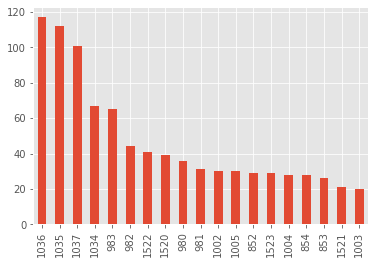

In [ ]:
#Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

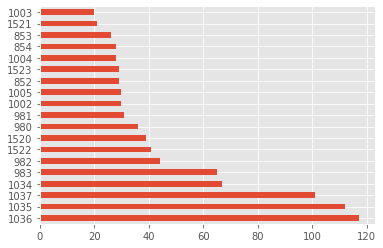

In [ ]:
#Gráfico de barras horizontais
df["LojaID"].value_counts(ascending=False).plot.barh()

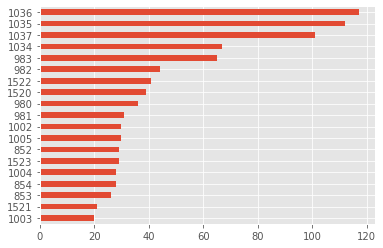

In [ ]:
#Gráfico de barras
df["LojaID"].value_counts(ascending=True).plot.barh();

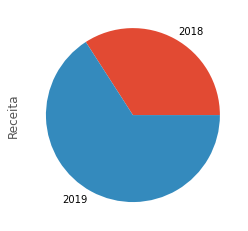

In [ ]:
#grafico pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [ ]:
#total de vendas por cidade
df["Cidade"].value_counts()


Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

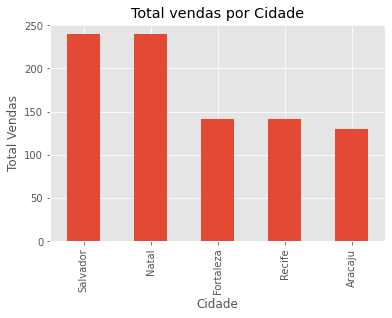

In [ ]:
#Adicionando titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade");
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

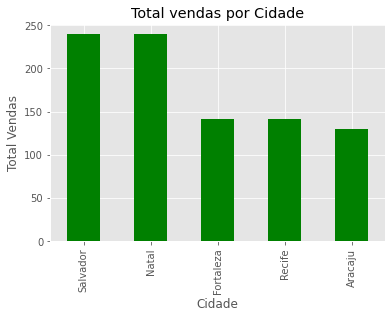

In [ ]:
#Adicionando cor
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="green");
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [ ]:
#Adicionando estilo customizado
plt.style.use("ggplot")

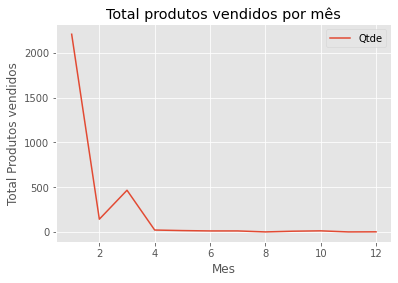

In [ ]:
df.groupby(df["Mes_Venda"])["Qtde"].sum().plot(title = "Total produtos vendidos por mês")
plt.xlabel("Mes")
plt.ylabel("Total Produtos vendidos")
plt.legend();

In [ ]:
df.groupby(df["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
#Apenas vendas de 2019
df_2019 = df[df["Ano_Venda"]==2019]


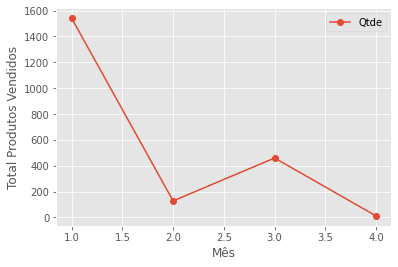

In [ ]:
#Total produtos vendidos por mês em 2019
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker = 'o')
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend();

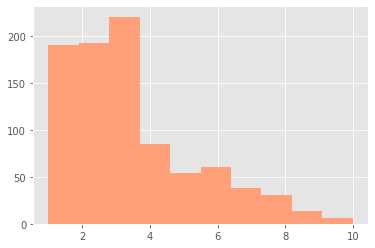

In [ ]:
#histograma
plt.hist(df["Qtde"], color="lightsalmon");

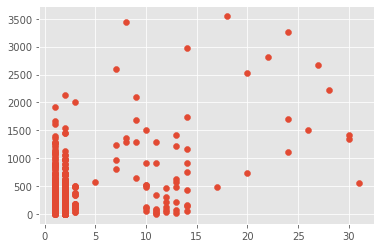

In [ ]:
#grafico de dispersão
plt.scatter(x=df_2019["Dia_Venda"], y = df_2019["Receita"]);

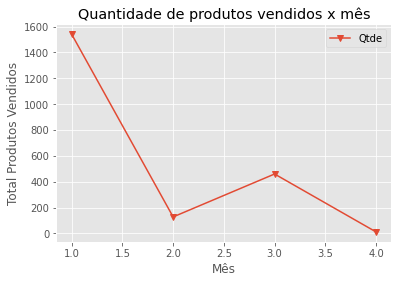

In [ ]:
#Salvando em png
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker="v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend()
plt.savefig("grafico QTDE x MES.png")